<a href="https://colab.research.google.com/github/Knottyanalyst/The-Sparks-Foundation/blob/main/Student_Score_Prediction_Using_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TSF Grip - Data Science and Business Analytics Internship

# Intern - Srujan Marathe

## Task 1 - To prediction the marks a student obtains given the number of hours studied every day using Supervised ML.



## Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as tts
#from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE

import math
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing the data using pandas.

In [ ]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

data = pd.read_csv(url)

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.shape

(25, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Correllation matrix to check the correlation between input and output variable. 

In [ ]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Visualizing the data using matplotlib and seaborn.

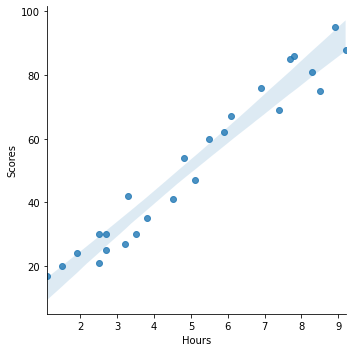

In [ ]:
sns.lmplot(x='Hours', y='Scores', data = data)

### The correlation matrix and the scatter plot shows the variables are linearly correlated.

## Preparing the data.

In [ ]:
x = data['Hours']
y = data['Scores']

x_train, x_test, y_train, y_test = tts(x, y, test_size = .1, random_state = 42)

## Building the model.

In [ ]:
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_test) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                 Scores   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              2194.
Date:                Sat, 05 Feb 2022   Prob (F-statistic):                    9.88e-23
Time:                        18:02:38   Log-Likelihood:                         -69.257
No. Observations:                  22   AIC:                                      140.5
Df Residuals:                      21   BIC:                                      141.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

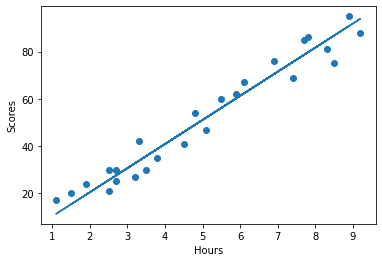

Hours    10.214682
dtype: float64

In [ ]:
plt.scatter(data['Hours'], data['Scores'])
plt.plot(data['Hours'], model.predict(data['Hours']))
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

model.params  # Slope and y-intercept of the best fit line.

### Checking for homoscedasticity.

In [ ]:
residual = y_train-model.predict(x_train)

#residual

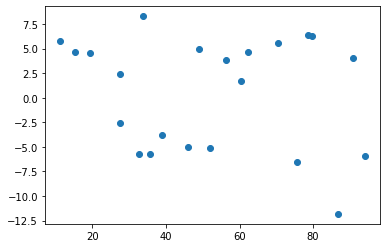

In [ ]:
plt.scatter(model.predict(x_train), residual)
plt.show()

### There is no pattern in the plot. So the data is homoscedastic.

## Checking for normality of residuals.

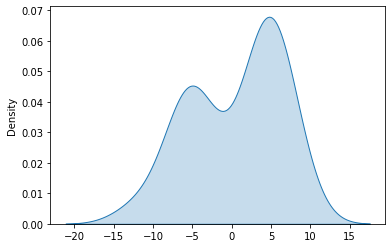

In [ ]:
sns.kdeplot(residual,fill=True)

### The distribution of residuals is fairly normal.

## Evaluating the model on test data.

In [ ]:
y_pred = model.predict(x_test)

print(y_pred, list(y_test))

8     84.781859
16    25.536705
0     25.536705
dtype: float64 [81, 30, 21]


## Evaluating the model using evaluation metrics. 
## Mean Absolute Error and Root Mean Squared Error.

In [ ]:
MAE = MAE(data['Scores'].values.reshape(-1, 1), model.predict(data['Hours'].values.reshape(-1, 1)))
MSE = MSE(data['Scores'].values.reshape(-1, 1), model.predict(data['Hours'].values.reshape(-1, 1)))

print('Mean Absolute Error :-', MAE)
print('Root Mean Squared Error :-', math.sqrt(MSE))

Mean Absolute Error :- 5.132160539706136
Root Mean Squared Error :- 5.490209256326321


## The model is ready to make predictions on unseen data.

### X=9.25 hrs/day

In [ ]:
predict = [[9.25]]

prediction = model.predict(predict)

print("Estimated score for 9.25 hrs/day studytime =", prediction[0])

Estimated score for 9.25 hrs/day studytime = 94.48580698645019
